In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
days = np.array([0, 7, 14, 21, 28], dtype=float)   # days since 01.03
I = np.array([117, 902, 4838, 18610, 52574], dtype=float)

lnI = np.log(I)

t_mean = np.mean(days)
lnI_mean = np.mean(lnI)

In [3]:
r = np.sum((days - t_mean) * (lnI - lnI_mean)) / np.sum((days - t_mean)**2)
a = lnI_mean - r * t_mean


In [4]:
I_fit = np.exp(a + r * days)

gamma = 0.1
beta = r + gamma

In [5]:
print(f"Fitted growth rate r = {r:.5f} per day")
print(f"Intercept a = {a:.5f} (so I0 = exp(a) = {np.exp(a):.1f})")
print(f"With gamma={gamma:.2f}/day → beta = {beta:.5f}/day")

Fitted growth rate r = 0.21775 per day
Intercept a = 5.10201 (so I0 = exp(a) = 164.4)
With gamma=0.10/day → beta = 0.31775/day


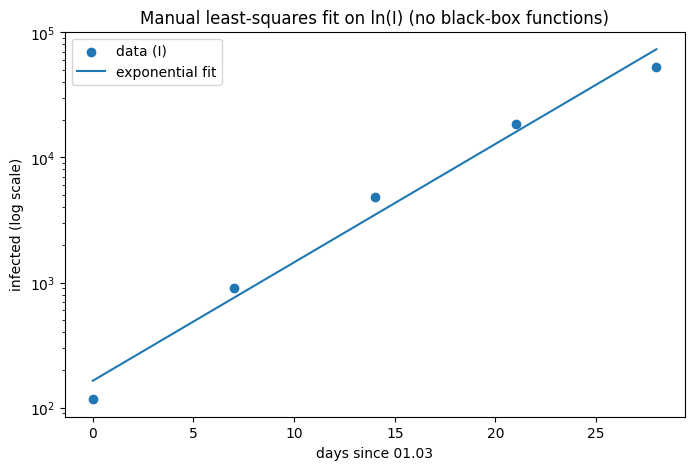

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(days, I, label="data (I)", zorder=3)
plt.plot(days, I_fit, label="exponential fit", zorder=2)
plt.yscale('log')          
plt.xlabel("days since 01.03")
plt.ylabel("infected (log scale)")
plt.title("Manual least-squares fit on ln(I) (no black-box functions)")
plt.legend()
plt.show()
